# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
2243 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 2243
Submissions graded.


### Dataset

In [328]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [329]:
# Filter by institution
specific_institutions = ['UiS'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
df = df[(df['Institution'].isin(specific_institutions))]

In [330]:
# Filter out all non INF100 related study programs
inf100_studyprograms = ['Nanoteknologi, Bachelor', 'Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Fysikk, Bachelor', 'Data science, Siv.ing.', 'Kognitiv vitenskap, Bachelor', 'Energi, Siv.ing.', 'Geofysikk, Bachelor', 'Anvendt matematikk, Bachelor', 'Geovitenskap, Bachelor', 'Kjemi, Bachelor', 'Matematikk, Bachelor', 'Statistikk og data science, Bachelor', 'Vær hav og klimafysikk, Bachelor', 'Havteknologi, Siv.ing.', 'Integrert masterprogram i aktuarfag og analyse', 'Informatikk, Årsstudium', 'Biologi, Bachelor', 'Geofag og informatikk, Bachelor', 'Molykelærbiologi, Bachelor', 'Havbruk, Siv.ing.', 'Medisinsk teknologi, Siv.ing.']
#df = df[(df['Studyprogram'].isin(inf100_studyprograms))]

In [331]:
# Filter out all non informatics students at UiB
informatics_studyprograms = ['Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Data science, Siv.ing.', 'Informatikk, Årsstudium']
#df = df[(df['Studyprogram'].isin(informatics_studyprograms))]

In [332]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [333]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [335]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 333 student submissions.



### Institutions

Institution
UiS    333
Name: count, dtype: int64


<Axes: ylabel='count'>

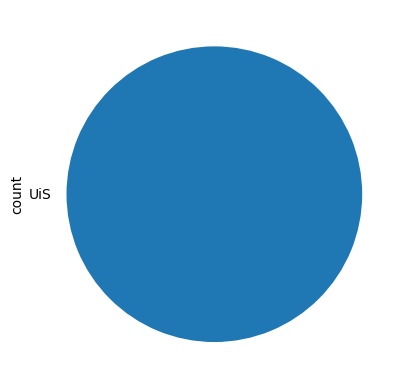

In [336]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Study Program

Series([], Name: count, dtype: int64)


<Axes: ylabel='count'>

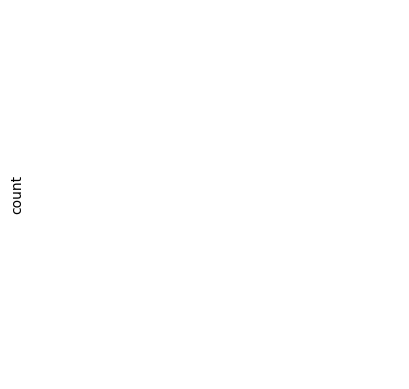

In [337]:
studyprogram = df.Studyprogram.unique()

studyprogram_column = "Studyprogram"
print(df[studyprogram_column].value_counts())
df[studyprogram_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2023     75
2024     68
2022     51
2021     25
2019     20
2020     18
2014      8
2018      8
2015      7
2017      7
2005      4
2012      3
2016      3
2007      3
Annet     3
2009      1
2011      1
2010      1
Name: count, dtype: int64


<Axes: ylabel='count'>

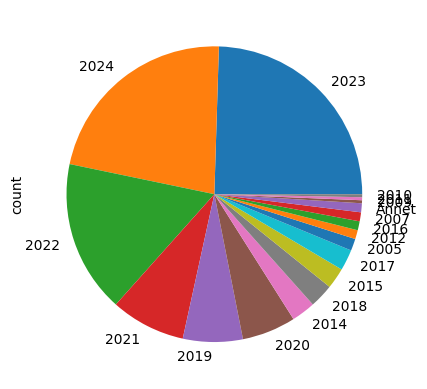

In [338]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    218
f     89
      26
Name: count, dtype: int64
Gender
m    0.654655
f    0.267267
     0.078078
Name: proportion, dtype: float64


<Axes: ylabel='count'>

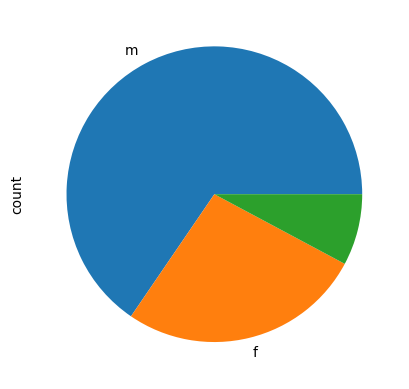

In [339]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [340]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

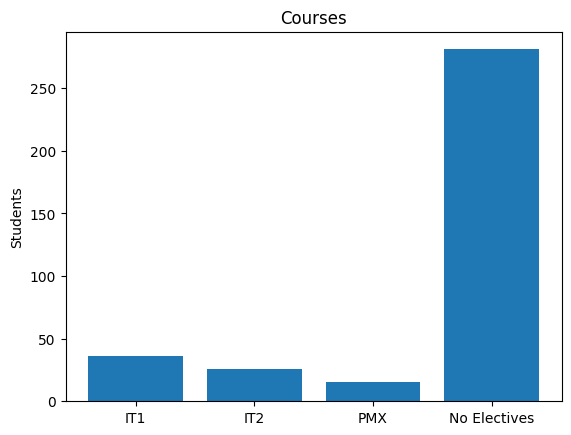

In [341]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

[51, 39, 180, 22, 23, 192, 205]


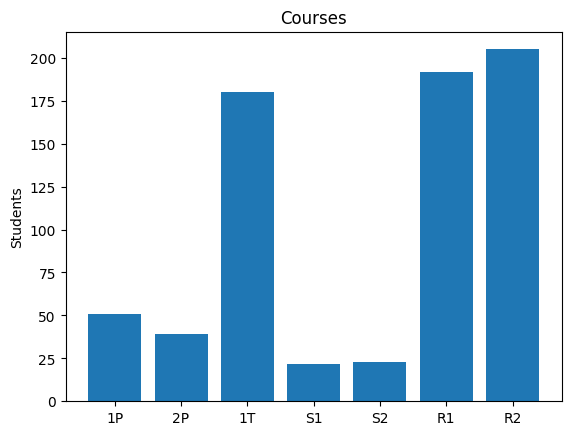

In [342]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

print(counts)
ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    269
Ja      63
Name: count, dtype: int64
OutsideExperience
Nei    0.810241
Ja     0.189759
Name: proportion, dtype: float64


<Axes: ylabel='count'>

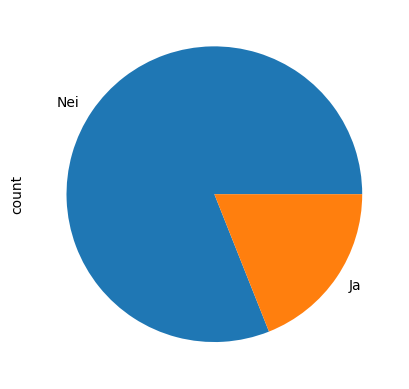

In [343]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [344]:
# Configurations
bins = 52
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 18.694
Standard deviation: 13.696


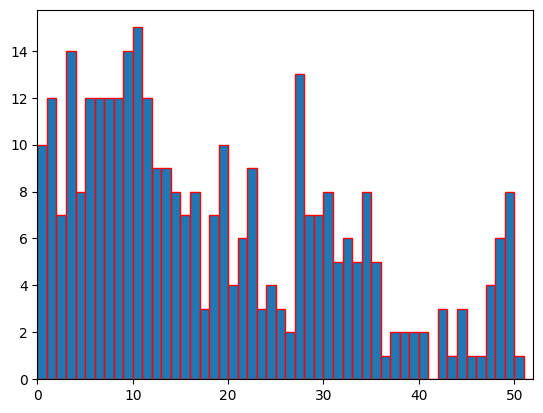

In [345]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()
fig.savefig('plots/allHist.png')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

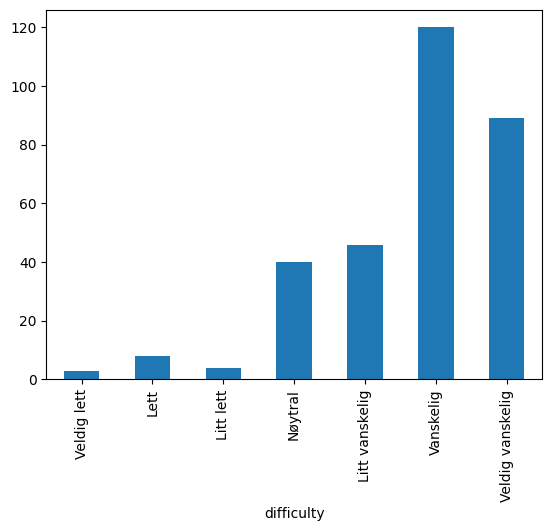

In [346]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [347]:
def compare_distributions(x, y, x_label, y_label):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, 52])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    fig.savefig('plots/graduateYear.png')

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

N students in 2023 and 2024: 143
Mean of 2023 and 2024: 21.814
Standard deviation of 2023 and 2024: 13.655

N students in before 2023: 190
Mean of before 2023: 16.345
Standard deviation of before 2023: 13.286


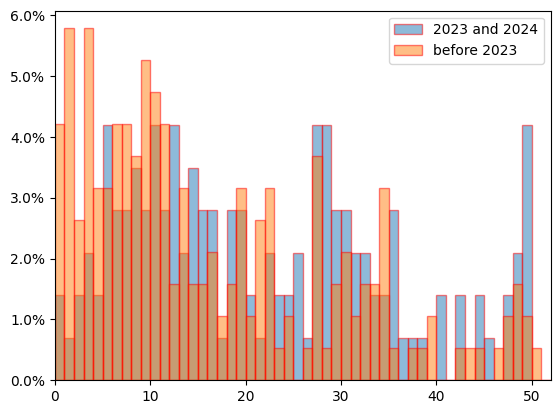

In [348]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

In [350]:
group1 = df[(years.isin(['2023', '2024']))]['Total']
group2 = df[(~years.isin(['2023', '2024']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: 3.902297933515466
P-value: 9.528377360741854e-05
Reject the null hypothesis: There is a significant difference between the two groups.


### Mathematics Courses

N students in 2P: 39
Mean of 2P: 16.877
Standard deviation of 2P: 13.458

N students in R2: 205
Mean of R2: 20.954
Standard deviation of R2: 13.329


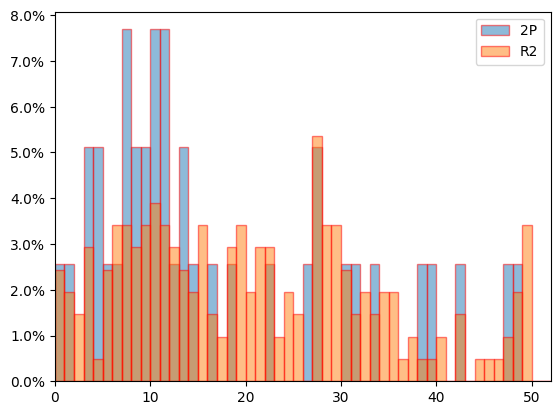

In [351]:
x = df[(df['2P'].isin(['2P']))]['Total']
y = df[(df['R2'].isin(['R2']))]['Total']
y = y[~np.isnan(y)]

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)

In [353]:
group1 = df[(df['2P'].isin(['2P']))]['Total']
group2 = df[(df['R2'].isin(['R2']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: -1.9776303850145358
P-value: 0.04797041887665087
Reject the null hypothesis: There is a significant difference between the two groups.


### Programming Electives

N students in IT2: 26
Mean of IT2: 35.354
Standard deviation of IT2: 12.751

N students in NoElective: 281
Mean of NoElective: 16.786
Standard deviation of NoElective: 12.601


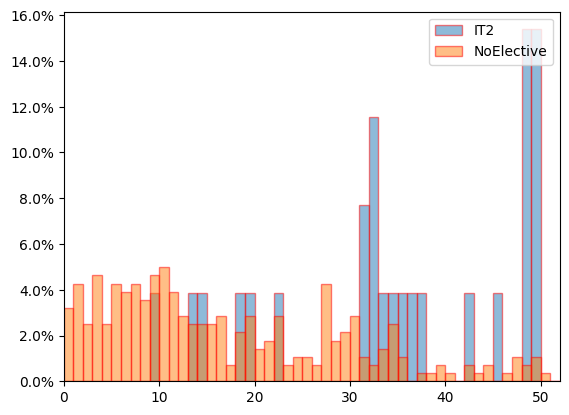

In [355]:
x = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
y = df[(df['NoElective'].isin([True]))]['Total']
y = y[~np.isnan(y)]

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)

In [357]:
group1 = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
group2 = df[(df['NoElective'].isin([True]))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: 5.8909574985433055
P-value: 3.839643070642065e-09
Reject the null hypothesis: There is a significant difference between the two groups.


### Outside Experience

N students in Outside experience: 63
Mean of Outside experience: 30.987
Standard deviation of Outside experience: 15.085

N students in No outside experience: 269
Mean of No outside experience: 15.884
Standard deviation of No outside experience: 11.619


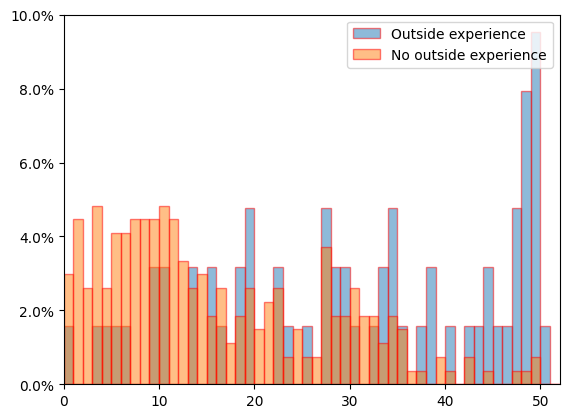

In [358]:
x = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
y = df[(df['OutsideExperience'].isin(['Nei']))]['Total']
y = y[~np.isnan(y)]

x_label = 'Outside experience'
y_label = 'No outside experience'

compare_distributions(x, y, x_label, y_label)

In [359]:
group1 = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
group2 = df[(df['OutsideExperience'].isin(['Nei']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Ra: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Ra: 6.854347975948896
P-value: 7.1638508420597965e-12
Reject the null hypothesis: There is a significant difference between the two groups.


### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [360]:
threshold = 48
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

Number of students with a score over 48: 15 (4.5%)


### Gender

N students in women: 89
Mean of women: 14.591
Standard deviation of women: 11.172

N students in men: 218
Mean of men: 20.814
Standard deviation of men: 14.366


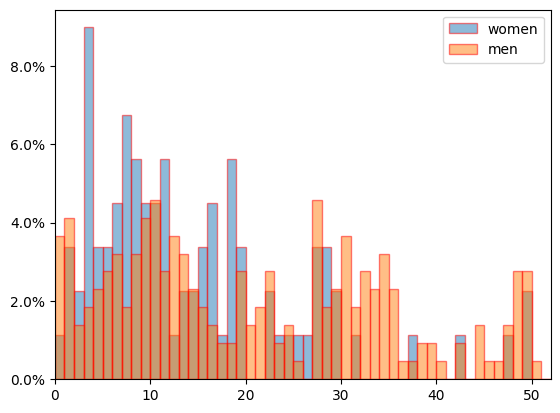

In [361]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [362]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [363]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       44.82 %
Booleans        58.87 %
Variables       44.94 %
Conditionals    50.53 %
Loops           17.98 %
Lists           22.37 %
Functions       11.34 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [364]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [365]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
0    196
1    137
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
Jeg vet ikke    140
int             137
str              23
float            18
list              8
bool              6
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
0    193
1    140
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           140
Jeg vet ikke    137
int              24
str              21
bool              7
list              1
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    225
1    108
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
Jeg vet ikke    161
str             108
int              18
bool             18
float            16
list              6
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    212
0    121
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            212
Jeg vet ikke    100

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [366]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    280
0     53
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            280
I don't know     28
6.0               2
1212.0            2
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [367]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    230
0    103
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           230
I don't know     45
1.2312            2
2.43              1
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [368]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    252
1     81
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        81
I don't know    75
246.0           44
123.0            4
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [369]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    189
0    144
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             189
I don't know     61
1.0              31
3.0              10
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [370]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    251
1     82
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    136
bca              80
b+c+a             5
'bca'             3
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [371]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    177
0    156
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0     177
10.0      29
15.0       1
10.2       1
220.0      1
80.0       1
30.0       1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    178
0    155
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            178
I don't know    127
10.0             22
15.0              1
10.2              1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [372]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
0    168
1    165
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    165
20.0     28
30.0      1
1.0       1
80.0      1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
0    173
1    160
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            160
I don't know    136
20.0             33
2.0               1
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [373]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
0    177
1    156
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    156
10.0     31
15.0      1
30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    205
1    128
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
I don't know    142
20.0            128
10.0             59
5.0               1
30.0              1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [374]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    205
1    128
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables4b_points
0    184
1    149
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
I don't know    154
10.0            149
20.0             28
30.0              1
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [375]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
0    173
1    160
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    160
10.0     20
30.0     11
1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    170
0    163
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    170
 10.0     13
 20.0      4
 15.0      2
-10.0      1
 2.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
0    171
1    162
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            162
I don't know    137
10.0             14
20.0              8
15.0              2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [376]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
0    176
1    157
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    157
20.0     16
10.0      5
60.0      1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    229
1    104
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    104
10.0     64
20.0     10
0.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    232
1    101
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
I don't know    149
30.0            101
20.0             53
10.0             22
60.0              1
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [377]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            265
Jeg vet ikke     58
False             6
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           299
Jeg vet ikke     16
True             15
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            229
False            54
Jeg vet ikke     44
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           291
Jeg vet ikke     22
True             14
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            289
Jeg vet ikke     23
False            17
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           260
Jeg vet ikke     59
True             10
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [378]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
Jeg vet ikke    162
False           153
True             13
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           247
Jeg vet ikke     64
True             19
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            135
False           101
Jeg vet ikke     93
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            248
Jeg vet ikke     72
False             9
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            211
Jeg vet ikke     89
False            29
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    211
True             98
False            22
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [379]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    190
False           119
True             20
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    177
False           126
True             27
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    168
True            151
False            10
Name: count, dtype: int64

Top 3 most common answers:
True and True
Jeg vet ikke    158
True            139
False            32
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    162
True            111
False            54
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    231
True             70
False            29
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [380]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            272
Jeg vet ikke     38
False            20
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           240
Jeg vet ikke     83
True              7
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           241
Jeg vet ikke     61
True             28
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            164
False            88
Jeg vet ikke     78
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            218
Jeg vet ikke     78
False            33
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
Jeg vet ikke    159
False           129
True             42
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [381]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    208
0    125
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       208
Jeg vet ikke     62
1                61
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [382]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    193
1    140
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               140
Jeg vet ikke    132
1                30
1 og 2           16
Ingenting        13
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [383]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
0    176
1    157
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               157
Jeg vet ikke     93
2 og 3           30
3                20
1 og 2           13
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [384]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    168
0    165
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          168
Jeg vet ikke     91
1                27
1, 2 og 3        15
2                14
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [385]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    263
1     70
Name: count, dtype: int64

Top 5 most common answers:
Loops1
I don't know    99
10.0            70
1.0             57
9.0             39
123456789.0     25
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [386]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    272
1     61
Name: count, dtype: int64

Top 5 most common answers:
Loops2
I don't know    102
10.0             61
2.0              57
8.0              36
2468.0           24
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [387]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    211
1    122
Name: count, dtype: int64

Top 5 most common answers:
Loops3
I don't know    146
100             122
0                21
102              14
98                3
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [388]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    281
1     52
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    146
4.0              52
1.0              42
3.0              29
0.0              13
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [389]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    286
1     47
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    259
5.0              47
113.0             4
3.0               3
0.0               3
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [390]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    296
1     37
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    263
9.0              37
0.0               8
2.0               2
4.5               2
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [391]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    268
1     65
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    180
10.0             72
20.0             65
102030.0          7
60.0              2
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [392]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    271
1     62
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    194
25.0             62
15.0             60
152535.0          3
20.0              2
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [393]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    213
1    120
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
Jeg vet ikke    167
[10, 20, 30]    120
[15, 35, 55]     14
[5, 15, 25]       3
[25, 20, 30]      1
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    282
1     51
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    193
[5, 35, 25]      51
[15, 35, 55]     41
[5, 15, 25]      18
[10, 35, 30]      6
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [394]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    231
1    102
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    217
15.0            102
510.0             3
50.0              1
5.1               1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [395]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    275
1     58
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    243
1.0              58
100.0            11
2.0               6
200.0             1
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [396]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    305
1     28
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    236
1.0              28
12.0             22
1.2              10
2.0               9
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [397]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    303
1     30
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    275
5.0              30
6.0               4
1.0               1
5209.0            1
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [398]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    300
1     33
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    220
10.0             33
6.0              26
5.0              11
9.0               9
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [399]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    312
1     21
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    282
abcxyz           20
abc               1
xyzabc            1
abcxabcyabcz      1
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [400]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    301
1     32
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    274
c                31
abcabc            1
[2, 2, 2]         1
2a 2b 2c          1
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [401]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    301
1     32
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    272
25.0             32
10.0              2
152535.0          2
15.0              2
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [402]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    329
1      4
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    283
80.0             10
90.0              4
23.0              3
60.0              2
Name: count, dtype: int64


# Programming Concept Dependence
Many of the tasks utilize concepts tested in earlier tasks. To better understand how well 

In [403]:
import networkx as nx
import matplotlib.pyplot as plt

In [404]:
# Define the tasks and the which other task they depend on
tasks = {        
    'Conditionals1': {'2 > 7'},
    'Conditionals2': {'100 != 100'},
    'Conditionals3': {'(10*2) < 9', '100 == 100'},
    'Conditionals4': {'(1 + 3) < (2*3)', '100 == 100'},
    
    'Loops1': {'Operators4', 'n < 10'},
    'Loops2': {'Operators4', 'n < 10'},
    'Loops3': {'Operators4', 'n < 10'},
    'Loops4': {'Operators4', '(n < 7) and (4 > n)'},
    'Loops5': {},
    'Loops6': {'Conditionals1', 'Loops5'},
    'Loops7': {'Operators5', 'Loops5'},

    'Lists1': {},
    'Lists2': {'Lists1'},
    'Lists3a': {'Lists2'},
    'Lists3b': {'Lists2'},
    
    'Functions1': {'Operators1'},
    'Functions2': {'Conditionals1', '100 == 100'},
    'Functions3': {'Conditionals4'},
    'Functions4': {'Operators4', '(10*2) < 9', 'Conditionals1'},
    'Functions5': {'Loops1'},
    'Functions6': {'Loops7'},
    'Functions7': {'Lists1'},
    'Functions8': {'Lists2'},
    'Functions9': {'Lists3a', 'Lists3b', 'Loops5'},
}

In [405]:
# Graph
# Initialize a directed graph (DAG)
G = nx.DiGraph()

# Add all tasks as nodes
G.add_nodes_from(tasks.keys())

In [406]:
# Add nodes and edges to the graph based on dependencies
for task, dependencies in tasks.items():
    for dependency in dependencies:
        # Add an edge from each dependency to the task
        G.add_edge(dependency, task)

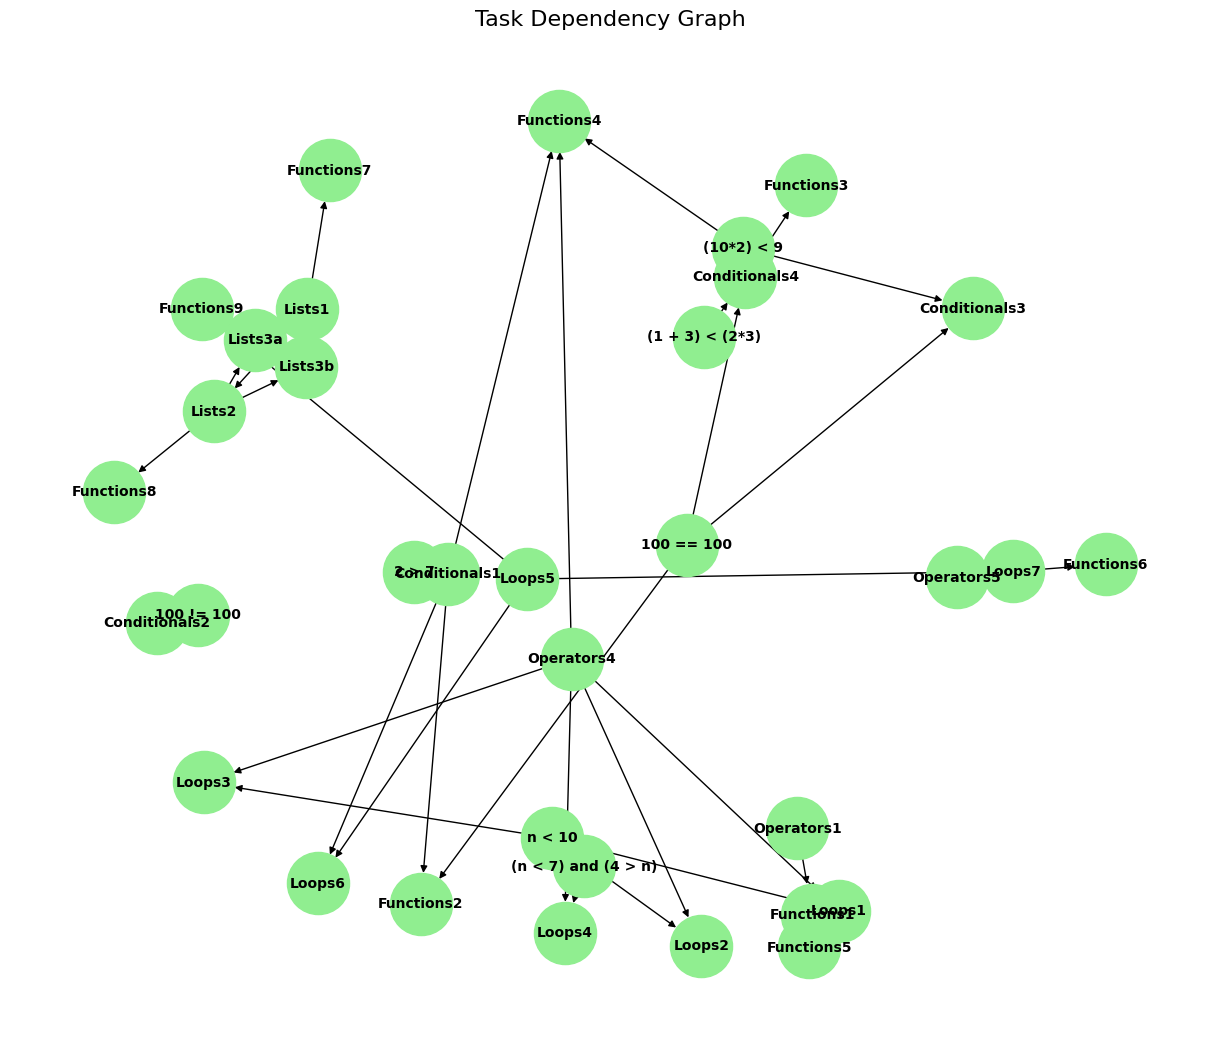

In [407]:
# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.title('Task Dependency Graph', fontsize=16)
plt.show()

In [408]:
def print_dependences(task):
    try:
        dependes = dependencies(task)
    except:
        dependes = []
    print(f'The task {task} has the following dependencies: {dependes}')
    n_correct = len(df[(df[task+'_points'] != 0)])
    print(f'Total number of students that managed task "{task}": {n_correct} / {len(df)}')

    if len(dependes) > 0: 
        print(f'How many students managed the dependent tasks?')
        for depend_task in dependes:
            n_correct = len(df[(df[depend_task+'_points'] != 0)])
            print(f'Total number of students that managed task "{depend_task}": {n_correct} / {len(df)}')
            task_df = df[(df[depend_task+'_points'] != 0)]

        print()
        n_correct = len(task_df[(task_df[task+'_points'] != 0)])
        n_total = len(task_df)
        print(f'Of all the students that managed all dependent tasks {n_correct} out of {n_total} managed "{task}"')
        print(f'This indicates that {n_total - n_correct} struggle with the non dependent concept in "{task}"')

def print_simple_dependeces(task):
    try:
        dependes = dependencies(task)
        if len(dependes) == 0:
            print('No dependence')
            return
    except:
        print('No dependence')
        return
        
    print(f'#### {task} ###')
    total_correct = len(df[(df[task+'_points'] != 0)])
    total_correct_percentage = round((total_correct / len(df)) * 100, 1)
    task_df = df
    for depend_task in dependes:
        task_df = task_df[(task_df[depend_task+'_points'] != 0)]
    dependent_correct = len(task_df)
    dependent_correct_percentage = round((dependent_correct / len(df)) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered', task, total_correct, '('+str(total_correct_percentage)+'%)'))
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered dependent tasks', str(dependes), dependent_correct, '('+str(dependent_correct_percentage)+'%)'))
    task_df = task_df[(task_df[task+'_points'] == 0)]
    task_percentage = round((len(task_df) / dependent_correct) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Managed dependent tasks, but failed', task, len(task_df), '('+str(task_percentage)+'%)'))
    

def dependencies(task):
    dependency_list = []
    for dependency in tasks[task]:
        try:
            dependency_list =+ dependencies(dependency)
        except:
            dependency_list.append(dependency)
    return dependency_list

In [409]:
for task in tasks:
    print_simple_dependeces(task)
    print()
    print()

#### Conditionals1 ###
Correctly answered                       Conditionals1                                        208 (62.5%)
Correctly answered dependent tasks       ['2 > 7']                                            299 (89.8%)
Managed dependent tasks, but failed      Conditionals1                                         98 (32.8%)


#### Conditionals2 ###
Correctly answered                       Conditionals2                                        140 (42.0%)
Correctly answered dependent tasks       ['100 != 100']                                       153 (45.9%)
Managed dependent tasks, but failed      Conditionals2                                         39 (25.5%)


#### Conditionals3 ###
Correctly answered                       Conditionals3                                        157 (47.1%)
Correctly answered dependent tasks       ['100 == 100', '(10*2) < 9']                         241 (72.4%)
Managed dependent tasks, but failed      Conditionals3                         